# CAO Points Analysis

[CAO](http://www.cao.ie/index.php?page=points&p=2021)

***

#### Importing Libaries

In [1]:
# Data Frames
import pandas as pd

from collections import namedtuple

# Read in PDF
import requests, PyPDF2

# Regular Expressions
import re

# Convenient HTTP Requests.
import requests as rq

# dates and times
import datetime as dt

# For downloading
import urllib.request as urlrq

# For Comparison
import datacompy

# Numerical Arrays
import numpy as np

# Cooler plots
import seaborn as sns

import matplotlib.pyplot as plt

#### Date and Time for saving data

In [2]:
# Get Current date and time.
now = dt.datetime.now()

# Format as string
nowstr = now.strftime('%Y%m%d_%H%M%S')

# 2021 Points

#### Save original data set

In [3]:
# Fetch CAO points URL
resp = rq.get('http://www2.cao.ie/points/l8.php')
# Have a quick peek
resp

<Response [200]>

In [4]:
#Create file path for original data
pathhtml = 'data/cao2021_'+ nowstr + '.html'

##### Error on Server
- Server says we should decode as per:
    Content-Type: text/html; charset=iso-8859-1
- However one line uses \x96 which is not defined in iso-8859-1
- Therefore we used the similar decoding standard cp1252
- This is very similar but includes \x96

In [5]:
# Server uses the incorrect encoding
original_encoding = resp.encoding
# Change to cp1252
resp.encoding = 'cp1252'

In [6]:
# Save The orginal html file
with open(pathhtml, 'w') as f:
    f.write(resp.text)

In [7]:
# Quick Check to confirm encoding
resp.encoding

'cp1252'

# Use regular Expressions to select the lines we want

In [8]:
# Compile Reg-Ex for Matching lines

re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

```def points_to_array(s):
    portfolio = ''
    if s[0] == '#':
        portfolio = '#'
    random = ''
    if s[-1] == '*':
        random = 'True'
    points = ''
    for i in s:
        if i.isdigit():
            points = points + i
    return [points, portfolio, random]```


In [9]:
# File path for csv file
path2021 = 'data/cao2021_csv_'+ nowstr + '.csv'

In [10]:

# Keep track of how many courses we process.
no_lines = 0

# Open CSV file for writing 
with open (path2021, 'w') as f:
    # Write a header row
    f.write(','.join(['Code', 'Title', 'PointsRD1', 'PointsRD2']) + '\n')
    # loop through lines of the response
    for line in resp.iter_lines():
        #decode the line using 'cp1252' - wrong encoding
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code
            course_code = dline[:5]
            #print (course_code)
            # course title
            course_title = dline[7:57].strip()
            #print (course_title)
            # Round one points
            course_points = re.split(' +', dline[60:])
            if len(course_points) !=2:
                course_points = course_points[ :2]
            # join the fields using a comma
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


<br>

**NB:** it was verified as of 09/11/2021 that there were 949 courses exactly in the cao2021 points list

In [11]:
df2021 = pd.read_csv(path2021)

In [12]:
df2021

,Code,Title,PointsRD1,PointsRD2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [13]:
df2021['PointsRD1'] = df2021['PointsRD1'].str.replace(r'\W',"")

<ipython-input-13-469e21142b27>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2021['PointsRD1'] = df2021['PointsRD1'].str.replace(r'\W',"")


In [14]:
df2021

,Code,Title,PointsRD1,PointsRD2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


<br>

# 2020 CAO Points

In [15]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [16]:
#Create file path for original data
pathxlsx = 'data/cao2020_'+ nowstr + '.xlsx'

In [17]:
# Save original file to disk
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20211231_222007.xlsx',
 <http.client.HTTPMessage at 0x212b1b2b6d0>)

<br> 

## Load Spreadsheet using Pandas

In [18]:
# Download and parse the excel spreadsheet
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows = 10)

In [19]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Spot Check Random Row
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [21]:
# Spot Check End of Data
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [22]:
#Create file path for PANDAS data
path = 'data/cao2020_'+ nowstr + '.csv'

In [23]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Save pandas data frame to disk
df2020.to_csv(path)

## 2019 Points following lecture Video

http://www2.cao.ie/points/lvl8_19.pdf

##### Steps to reproduce

 - Download orginal PDF
 - Open Original pdf in Microsoft Word
 - Save Microsoft Words Coverted PDF
 - Re save version in word for editing
 - Delete Headers and footers
 - Delete intro on page 1
 - Select All and copy
 - Paste into notepad++
 - Remove HEI name headings and paste into each course line
 - Delete Blank Lines
 - Replace Double Tab Characters with Single Tab
 - Deleted all tab characters at end 
 - Replace all backticks with commas

In [25]:
df2019 = pd.read_csv('data/2019POINTS_20211104103000_edited.csv', sep= '\t')

In [26]:
df2019

,Course Code,Course,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [27]:
df2019['EOS'] = df2019['EOS'].str.replace(r'\W',"")

<ipython-input-27-8ca3eba8327f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2019['EOS'] = df2019['EOS'].str.replace(r'\W',"")


In [28]:
# Create a file path for the pandas data.
path2019 = 'data/cao2019_' + nowstr + '.csv'

In [29]:
# Save pandas data frame to disk.
df2019.to_csv(path2019)

# Quick look at the 3 data frames

In [30]:

df2021

,Code,Title,PointsRD1,PointsRD2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [31]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df2019

,Course Code,Course,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


<br>

## Concatonate and Join

<br>

Concatonate and Join

In [33]:
courses2021 = df2021[['Code', 'Title']]
courses2021

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [34]:
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
courses2020.columns = ['Code', 'Title']
courses2020

,Code,Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [35]:
courses2019 = df2019[['Course Code','Course']]
courses2019.columns = ['Code', 'Title']
courses2019

,Code,Title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [36]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [37]:
allcourses.sort_values('Code')

,Code,Title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
3342,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [38]:
# finds all extra copies of duplicated rolls
allcourses[allcourses.duplicated()]

,Code,Title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [39]:
#Copy of the combo of 2021, 2020 and 2019 data frame with the duplicates removed
allcourses.drop_duplicates()

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3281,TL801,Animation Visual Effects and Motion Design
3282,TL802,"TV, Radio and New Media"
3283,TL803,Music Technology
3286,TL812,Computing with Digital Media


In [40]:
# finds all extra copies of duplicated rolls
# based only on 'Code' column
allcourses[allcourses.duplicated(subset=['Code'])]

,Code,Title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [41]:
#Copy of the combo of 2021,2020 and 2019 data frame with the duplicates removed
# based only on 'Code' column
allcourses.drop_duplicates(subset = ['Code'], inplace = True, ignore_index=True )

In [42]:
allcourses

,Code,Title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1646,SG441,Environmental Science
1647,SG446,Applied Archaeology
1648,TL803,Music Technology
1649,TL812,Computing with Digital Media


<br>

### Join the Points

In [43]:
# Set the index to the code column.
df2021.set_index('Code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [44]:
# Set the index to the code column.
allcourses.set_index('Code', inplace=True)

In [45]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,Title,points_r1_2021
Code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [46]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [47]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [48]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,Title,points_r1_2021,points_r1_2020
Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [49]:
df2019_r1 = df2019[['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [50]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [51]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,Title,points_r1_2021,points_r1_2020,points_r1_2019
Code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


In [52]:
allcourses.to_csv('All_Courses_RD1.csv')

In [53]:
print(list(allcourses.columns))

['Title', 'points_r1_2021', 'points_r1_2020', 'points_r1_2019']


In [54]:
# test to ensure points columns are the same types of data - Panda series
for col in list (allcourses.columns):
    print(allcourses[col])
    print('\n')
    print(type(allcourses[col]))

Code
AL801       Software Design for Virtual Reality and Gaming
AL802    Software Design in Artificial Intelligence for...
AL803    Software Design for Mobile Apps and Connected ...
AL805      Computer Engineering for Network Infrastructure
AL810                                   Quantity Surveying
                               ...                        
SG441                                Environmental Science
SG446                                  Applied Archaeology
TL803                                     Music Technology
TL812                         Computing with Digital Media
WD148                                    Tourism Marketing
Name: Title, Length: 1651, dtype: object


<class 'pandas.core.series.Series'>
Code
AL801    300
AL802    313
AL803    350
AL805    321
AL810    328
        ... 
SG441    NaN
SG446    NaN
TL803    NaN
TL812    NaN
WD148    NaN
Name: points_r1_2021, Length: 1651, dtype: object


<class 'pandas.core.series.Series'>
Code
AL801    303
AL802    332


## Cleaning up the data


In [55]:
# Export the data to a CSV file
allcourses.to_csv('All_Courses_Check.csv')

At this point I exported the data to csv to have al look at how my data was looking.
I spent an inordinate amount of time looking to see how to remove the special characters and the text from the dataframe and in the end realised it was far quicker to manipulate the data manually in excel using the find/replace function.
Steps in Excel:

 - Find and replace: # with ''
 - Find and replace: mat with '' (in 2019 column only)
 - Find and replace: +matric with ''
 - Save file as Clean_CAO_Data.csv

In [56]:
# read back in clean data
CAO_R1_POINTS = pd.read_csv('Clean_CAO_Data.csv')
CAO_R1_POINTS

,Code,Title,points_r1_2021,points_r1_2020,points_r1_2019
0,AL801,Software Design for Virtual Reality and Gaming,300.0,303.0,304.0
1,AL802,Software Design in Artificial Intelligence for...,313.0,332.0,301.0
2,AL803,Software Design for Mobile Apps and Connected ...,350.0,337.0,309.0
3,AL805,Computer Engineering for Network Infrastructure,321.0,333.0,329.0
4,AL810,Quantity Surveying,328.0,319.0,307.0
...,...,...,...,...,...
1646,SG441,Environmental Science,NaN,NaN,297.0
1647,SG446,Applied Archaeology,NaN,NaN,289.0
1648,TL803,Music Technology,NaN,NaN,264.0
1649,TL812,Computing with Digital Media,NaN,NaN,369.0


In [57]:
CAO_R1_POINTS['points_r1_2021'].describe()

count     923.000000
mean      407.666306
std       128.706224
min        57.000000
25%       303.000000
50%       391.000000
75%       499.000000
max      1028.000000
Name: points_r1_2021, dtype: float64

In [58]:
CAO_R1_POINTS['points_r1_2020'].describe()

count    1394.000000
mean      350.995696
std       134.433752
min        55.000000
25%       252.250000
50%       316.500000
75%       433.000000
max      1088.000000
Name: points_r1_2020, dtype: float64

In [59]:
CAO_R1_POINTS['points_r1_2019'].describe()

count    906.000000
mean     374.951435
std      123.902697
min       55.000000
25%      290.000000
50%      348.000000
75%      440.000000
max      979.000000
Name: points_r1_2019, dtype: float64

<AxesSubplot:>

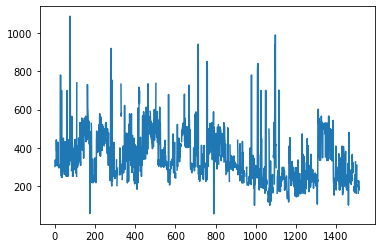

In [60]:
CAO_R1_POINTS['points_r1_2020'].plot()

<AxesSubplot:>

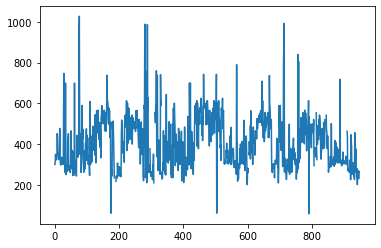

In [61]:
CAO_R1_POINTS['points_r1_2021'].plot()

<AxesSubplot:>

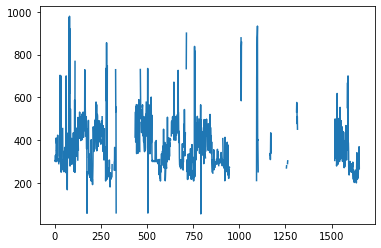

In [62]:
CAO_R1_POINTS['points_r1_2019'].plot()

In [63]:
print ('The number of NaNs in 2021 is:')
CAO_R1_POINTS['points_r1_2021'].isnull().sum()

The number of NaNs in 2021 is:


728

In [64]:
print ('The number of NaNs in 2020 is:')
CAO_R1_POINTS['points_r1_2020'].isnull().sum()

The number of NaNs in 2020 is:


257

In [65]:
print ('The number of NaNs in 2019 is:')
CAO_R1_POINTS['points_r1_2019'].isnull().sum()

The number of NaNs in 2019 is:


745

### Removing the Rows with NaN in any of the points column

At this point I wanted to compare the points for the courses that had been run all 3 years so I removed all the rows that had NAN in any of the columns

In [66]:
CAO_R1_POINTS = CAO_R1_POINTS[CAO_R1_POINTS['points_r1_2021'].notna()]

In [67]:
CAO_R1_POINTS = CAO_R1_POINTS[CAO_R1_POINTS['points_r1_2020'].notna()]

In [68]:
CAO_R1_POINTS = CAO_R1_POINTS[CAO_R1_POINTS['points_r1_2019'].notna()]

In [69]:
CAO_R1_POINTS

,Code,Title,points_r1_2021,points_r1_2020,points_r1_2019
0,AL801,Software Design for Virtual Reality and Gaming,300.0,303.0,304.0
1,AL802,Software Design in Artificial Intelligence for...,313.0,332.0,301.0
2,AL803,Software Design for Mobile Apps and Connected ...,350.0,337.0,309.0
3,AL805,Computer Engineering for Network Infrastructure,321.0,333.0,329.0
4,AL810,Quantity Surveying,328.0,319.0,307.0
...,...,...,...,...,...
941,WD195,Architectural and Building Information Modelli...,279.0,279.0,266.0
943,WD210,Software Systems Development,260.0,279.0,271.0
944,WD211,Creative Computing,270.0,271.0,275.0
945,WD212,Recreation and Sport Management,262.0,270.0,274.0


In [70]:
CAO_R1_POINTS.to_csv('CAO_R1_POINTS_Check.csv')

In [71]:
# Changeing the points columns to ints to remove .0
CAO_R1_POINTS = CAO_R1_POINTS.astype({"points_r1_2021": int, "points_r1_2020": int, "points_r1_2019": int })
CAO_R1_POINTS

,Code,Title,points_r1_2021,points_r1_2020,points_r1_2019
0,AL801,Software Design for Virtual Reality and Gaming,300,303,304
1,AL802,Software Design in Artificial Intelligence for...,313,332,301
2,AL803,Software Design for Mobile Apps and Connected ...,350,337,309
3,AL805,Computer Engineering for Network Infrastructure,321,333,329
4,AL810,Quantity Surveying,328,319,307
...,...,...,...,...,...
941,WD195,Architectural and Building Information Modelli...,279,279,266
943,WD210,Software Systems Development,260,279,271
944,WD211,Creative Computing,270,271,275
945,WD212,Recreation and Sport Management,262,270,274


In [72]:
CAO_R1_POINTS.set_index('Code', inplace=True)

<AxesSubplot:xlabel='Code'>

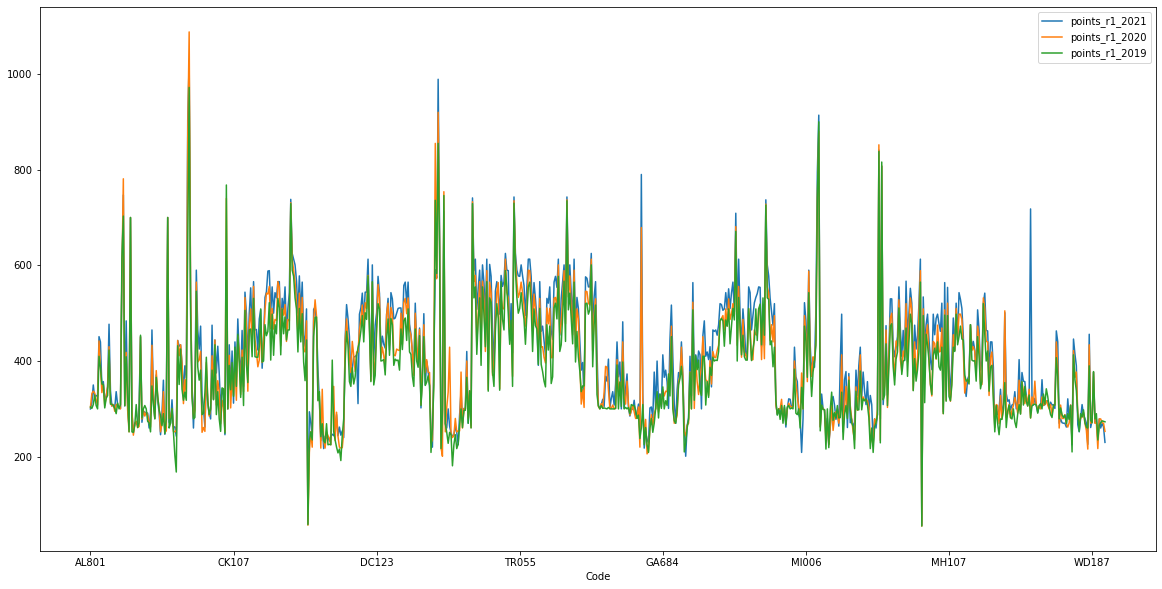

In [73]:
CAO_R1_POINTS.plot(figsize=(20, 10))

<AxesSubplot:ylabel='Frequency'>

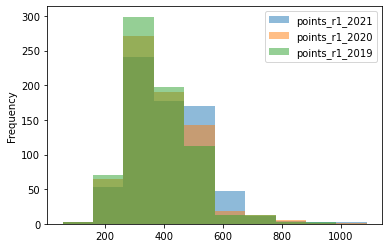

In [74]:
CAO_R1_POINTS.plot(kind = 'hist', alpha=.5)

array([[<AxesSubplot:title={'center':'points_r1_2021'}>,
        <AxesSubplot:title={'center':'points_r1_2020'}>],
       [<AxesSubplot:title={'center':'points_r1_2019'}>, <AxesSubplot:>]],
      dtype=object)

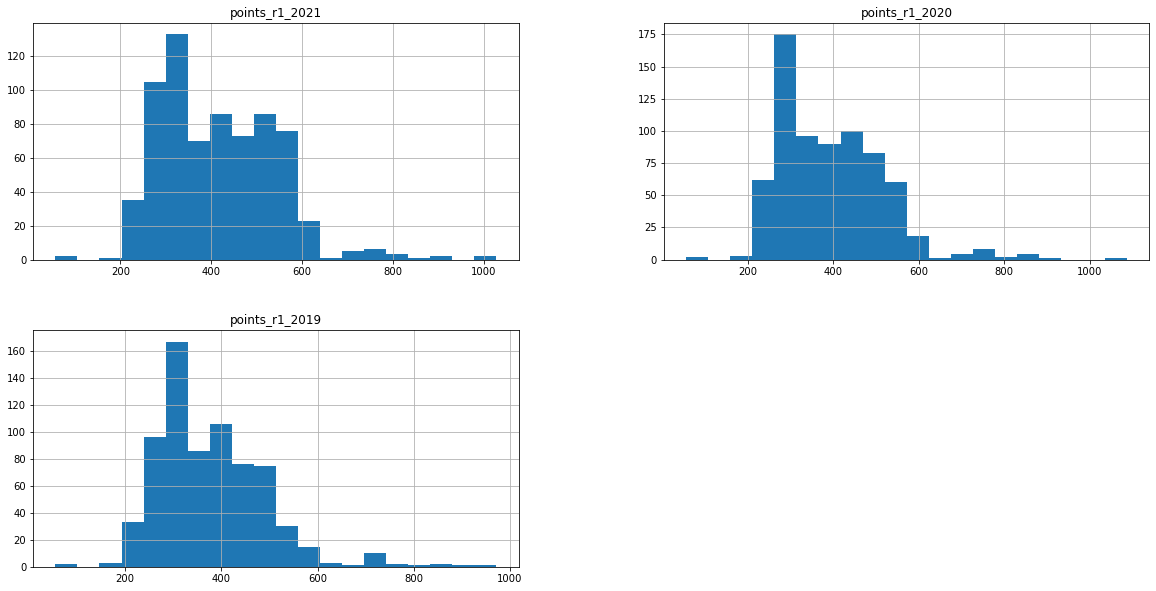

In [75]:
CAO_R1_POINTS.hist(figsize=(20, 10), bins = 20)

NameError: name 'x' is not defined

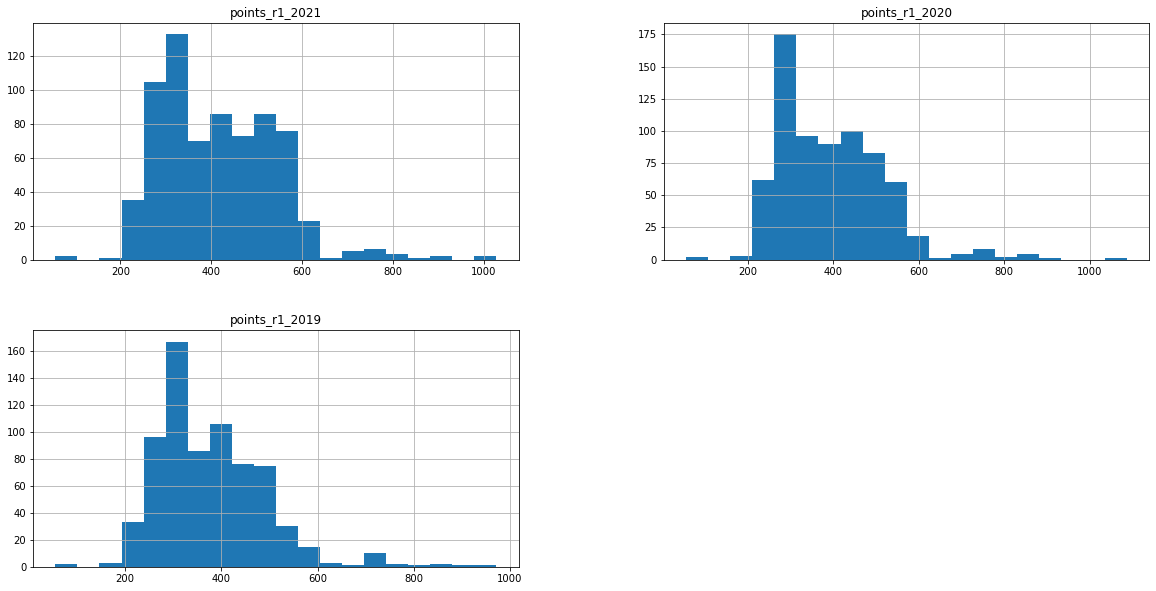

In [77]:
CAO_R1_POINTS.hist(figsize=(20, 10), bins = 20)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

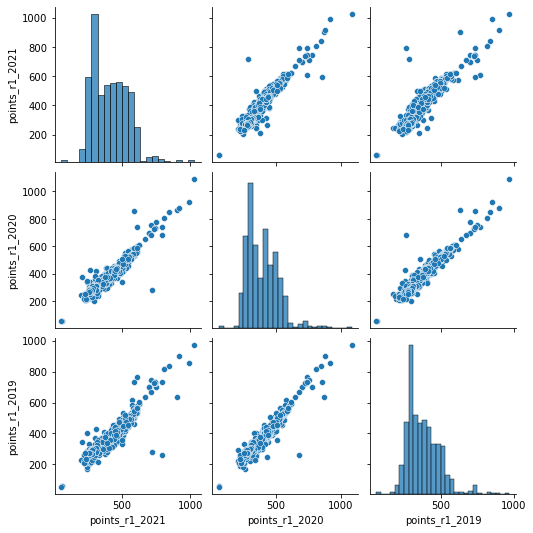

In [78]:
sns.pairplot(CAO_R1_POINTS)

In [89]:
CAO_R1_POINTS.dtypes

Title             object
points_r1_2021     int32
points_r1_2020     int32
points_r1_2019     int32
bool2021>2020       bool
dtype: object

In [79]:
CAO_R1_POINTS['bool2021>2020'] = CAO_R1_POINTS['points_r1_2021'] > CAO_R1_POINTS['points_r1_2020']
CAO_R1_POINTS['bool2020>2019'] = CAO_R1_POINTS['points_r1_2020'] > CAO_R1_POINTS['points_r1_2019']
CAO_R1_POINTS

,Title,points_r1_2021,points_r1_2020,points_r1_2019,bool2021>2020,bool2020>2019
Code,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304,False,False
AL802,Software Design in Artificial Intelligence for...,313,332,301,False,True
AL803,Software Design for Mobile Apps and Connected ...,350,337,309,True,True
AL805,Computer Engineering for Network Infrastructure,321,333,329,False,True
AL810,Quantity Surveying,328,319,307,True,True
...,...,...,...,...,...,...
WD195,Architectural and Building Information Modelli...,279,279,266,False,True
WD210,Software Systems Development,260,279,271,False,True
WD211,Creative Computing,270,271,275,False,False


In [80]:
CAO_R1_POINTS['bool2021>2020'].value_counts()

True     529
False    181
Name: bool2021>2020, dtype: int64

In [81]:
CAO_R1_POINTS['bool2020>2019'].value_counts()

True     514
False    196
Name: bool2020>2019, dtype: int64

In [82]:
CAO_R1_POINTS['points_going_up'] = CAO_R1_POINTS['bool2021>2020'] == CAO_R1_POINTS['bool2020>2019']

In [83]:
CAO_R1_POINTS['points_going_up'].value_counts()

True     449
False    261
Name: points_going_up, dtype: int64

In [84]:
CAO_R1_POINTS

,Title,points_r1_2021,points_r1_2020,points_r1_2019,bool2021>2020,bool2020>2019,points_going_up
Code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304,False,False,True
AL802,Software Design in Artificial Intelligence for...,313,332,301,False,True,False
AL803,Software Design for Mobile Apps and Connected ...,350,337,309,True,True,True
AL805,Computer Engineering for Network Infrastructure,321,333,329,False,True,False
AL810,Quantity Surveying,328,319,307,True,True,True
...,...,...,...,...,...,...,...
WD195,Architectural and Building Information Modelli...,279,279,266,False,True,False
WD210,Software Systems Development,260,279,271,False,True,False
WD211,Creative Computing,270,271,275,False,False,True


In [85]:
CAO_R1_POINTS.set_index('Code', inplace=True)


KeyError: "None of ['Code'] are in the columns"

In [ ]:
CAO_R1_POINTS

In [ ]:
CAO_R1_POINTS_CL = CAO_R1_POINTS.drop(columns ='bool2021>2020', inplace = True)

In [86]:
CAO_R1_POINTS_CL = CAO_R1_POINTS.drop(columns ='bool2020>2019', inplace = True)

In [87]:
CAO_R1_POINTS_CL = CAO_R1_POINTS.drop(columns ='points_going_up', inplace = True)

In [88]:
CAO_R1_POINTS_CL

In [ ]:
#Replacing the NAN
CAO_POINTS = CAO_POINTS.fillna(0)
CAO_POINTS

In [ ]:
# Changeing the points columns to ints to remove .0
CAO_POINTS = CAO_POINTS.astype({"points_r1_2021": int, "points_r1_2020": int, "points_r1_2019": int })
CAO_POINTS

In [ ]:
CAO_POINTS

In [ ]:
CAO_POINTS.describe()

In [ ]:
CAO_POINTS = pd.DataFrame(CAO_POINTS)
CAO_POINTS

In [ ]:
CAO_POINTS1 = CAO_POINTS.replace(np.nan, '', regex=True)

In [ ]:
CAO_POINTS1

In [ ]:
CAO_POINTS.isnull().values.any()

In [ ]:
CAO_POINTS

In [ ]:
CAO_POINTS['bool2021>2020'] = CAO_POINTS['points_r1_2021'] > CAO_POINTS['points_r1_2020']
CAO_POINTS['bool2020>2019'] = CAO_POINTS['points_r1_2020'] > CAO_POINTS['points_r1_2019']

In [ ]:
CAO_POINTS

In [ ]:
CAO_POINTS['bool2021>2020'].value_counts()

In [ ]:
CAO_POINTS['bool2020>2019'].value_counts()

In [ ]:
CAO_POINTS['points_r1_2021'] = pd.to_numeric(CAO_POINTS['points_r1_2021'])

In [ ]:
CAO_POINTS_WD  = CAO_POINTS['points_r1_2021'].dropna()

In [ ]:
CAO_POINTS_WD

In [ ]:
CAO_POINTS['bool2021>2020'] = CAO_POINTS['points_r1_2021'] > CAO_POINTS['points_r1_2020']

In [ ]:
CAO_POINTS

In [ ]:
CAO_POINTS['bool2020>2019'] = CAO_POINTS['points_r1_2020'] > CAO_POINTS['points_r1_2019']

In [ ]:
CAO_POINTS

In [ ]:
CAO_POINTS['points_going_up'] = CAO_POINTS['bool2021>2020'] == CAO_POINTS['bool2020>2019'] or 

In [ ]:
CAO_POINTS